# SOLAR RADIATION PREDICTION

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

### Getting our Data

In [2]:
df = pd.read_csv(r'C:\Users\Harnoor Kaur\AIML END PROJECT\SolarPrediction.csv')
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [3]:
df.isnull().any() # to see number of missing elements, use df.isnull().sum()

UNIXTime                  False
Data                      False
Time                      False
Radiation                 False
Temperature               False
Pressure                  False
Humidity                  False
WindDirection(Degrees)    False
Speed                     False
TimeSunRise               False
TimeSunSet                False
dtype: bool

### Calculating VIF

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Temperature','Pressure','Humidity','Speed','WindDirection(Degrees)']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [5]:
vif
# The VIF for Pressure is so high, that it influences Temperature's variance to swell, hence pressure is dropped and VIF
# calculated again

,VIF,Features
0,82.077639,Temperature
1,129.064887,Pressure
2,10.731528,Humidity
3,4.445383,Speed
4,4.292385,WindDirection(Degrees)


In [6]:
df.drop('Pressure', axis=1)

,UNIXTime,Data,Time,Radiation,Temperature,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,101,164.19,7.87,06:41:00,17:42:00


In [7]:
variables_1 = df[['Temperature','Humidity','Speed','WindDirection(Degrees)']]
vif_1 = pd.DataFrame()
vif_1['VIF'] = [variance_inflation_factor(variables_1.values, i) for i in range(variables_1.shape[1])]
vif_1['Features'] = variables_1.columns

In [8]:
vif_1

# Though the VIF of Temp is still high, this is mainly because of inclusion of humidity since both have atleast some amount
# of correlation amongst each other. Also, dropping temp would lead to a deficit of a key factor used to check the radiation.
# Hence, we proceed with these four features itself.

,VIF,Features
0,11.246320,Temperature
1,7.372081,Humidity
2,4.101280,Speed
3,3.685892,WindDirection(Degrees)


### Data Preprocessing

In [9]:
df.columns.values

array(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'], dtype=object)

In [10]:
cols = ['Radiation', 'Temperature', 
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'Pressure','TimeSunRise',
       'TimeSunSet', 'UNIXTime', 'Data', 'Time']

In [11]:
data_ready = df[cols] # rearranging columns
data_ready

,Radiation,Temperature,Humidity,WindDirection(Degrees),Speed,Pressure,TimeSunRise,TimeSunSet,UNIXTime,Data,Time
0,1.21,48,59,177.39,5.62,30.46,06:13:00,18:13:00,1475229326,9/29/2016 12:00:00 AM,23:55:26
1,1.21,48,58,176.78,3.37,30.46,06:13:00,18:13:00,1475229023,9/29/2016 12:00:00 AM,23:50:23
2,1.23,48,57,158.75,3.37,30.46,06:13:00,18:13:00,1475228726,9/29/2016 12:00:00 AM,23:45:26
3,1.21,48,60,137.71,3.37,30.46,06:13:00,18:13:00,1475228421,9/29/2016 12:00:00 AM,23:40:21
4,1.17,48,62,104.95,5.62,30.46,06:13:00,18:13:00,1475228124,9/29/2016 12:00:00 AM,23:35:24
...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,44,102,145.42,6.75,30.43,06:41:00,17:42:00,1480587604,12/1/2016 12:00:00 AM,00:20:04
32682,1.17,44,102,117.78,6.75,30.42,06:41:00,17:42:00,1480587301,12/1/2016 12:00:00 AM,00:15:01
32683,1.20,44,102,145.19,9.00,30.42,06:41:00,17:42:00,1480587001,12/1/2016 12:00:00 AM,00:10:01
32684,1.23,44,101,164.19,7.87,30.42,06:41:00,17:42:00,1480586702,12/1/2016 12:00:00 AM,00:05:02


In [12]:
# dropping columns that are not required according to our analysis
data_ready = data_ready.drop(['Pressure','TimeSunRise','TimeSunSet','UNIXTime','Data','Time'], axis=1)
data_ready

,Radiation,Temperature,Humidity,WindDirection(Degrees),Speed
0,1.21,48,59,177.39,5.62
1,1.21,48,58,176.78,3.37
2,1.23,48,57,158.75,3.37
3,1.21,48,60,137.71,3.37
4,1.17,48,62,104.95,5.62
...,...,...,...,...,...
32681,1.22,44,102,145.42,6.75
32682,1.17,44,102,117.78,6.75
32683,1.20,44,102,145.19,9.00
32684,1.23,44,101,164.19,7.87


### Splitting for Training and Testing

In [13]:
data = data_ready.values
X, y = data[:,1:], data[:,0]  # splitting and getting the independent attributes, X and dependent attribute y
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-0.50043927, -0.61625306,  0.40761954, -0.17873758],
       [-0.50043927, -0.65472966,  0.40028483, -0.82335911],
       [-0.50043927, -0.69320626,  0.1834901 , -0.82335911],
       [-0.50043927, -0.57777646, -0.06949721, -0.82335911],
       [-0.50043927, -0.50082325, -0.46340711, -0.17873758]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)  # splitting in the ratio 70:30

### Linear Regression Model

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

### Making Predictions

In [17]:
y_hat = model.predict(X_train)

C:\Users\Harnoor Kaur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harnoor Kaur\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


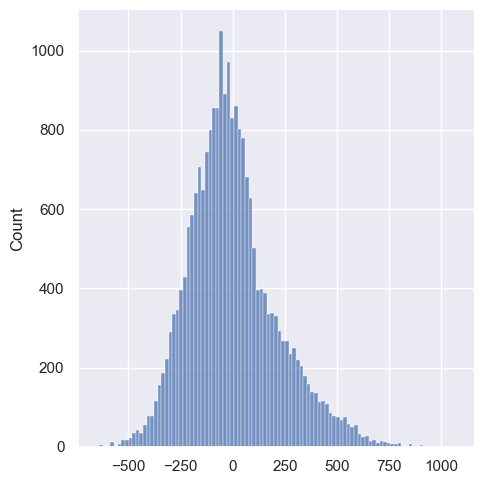

In [18]:
inf_mask = np.logical_or(np.isposinf(y_train), np.isneginf(y_train))
y_train[inf_mask] = np.nan  # Replace infinity values with NaN

inf_mask = np.logical_or(np.isposinf(y_hat), np.isneginf(y_hat))
y_hat[inf_mask] = np.nan

# Use displot for a more flexible distribution plot
sns.displot(y_train - y_hat)

In [19]:
model.intercept_

206.87895083047556

In [20]:
model.coef_

array([ 2.30634392e+02,  6.22531457e-02, -1.46045072e+01,  3.18182571e+01])

In [21]:
y_pred = model.predict(X_test) # making predictions

In [22]:
type(X)

numpy.ndarray

In [23]:
X_new = pd.DataFrame(X)

In [24]:
type(X_new)

pandas.core.frame.DataFrame

In [25]:
X_new_renamed = X_new.rename(columns={0:'Temparature',1:'Humidity',2:'WindDirection(Degrees)',3:'Speed'})

In [26]:
X_new_renamed

,Temparature,Humidity,WindDirection(Degrees),Speed
0,-0.500439,-0.616253,0.407620,-0.178738
1,-0.500439,-0.654730,0.400285,-0.823359
2,-0.500439,-0.693206,0.183490,-0.823359
3,-0.500439,-0.577776,-0.069497,-0.823359
4,-0.500439,-0.500823,-0.463407,-0.178738
...,...,...,...,...
32681,-1.145490,1.038241,0.023209,0.145006
32682,-1.145490,1.038241,-0.309138,0.145006
32683,-1.145490,1.038241,0.020443,0.789627
32684,-1.145490,0.999764,0.248901,0.465884


### Model Summary

In [27]:
reg_summary = pd.DataFrame(X_new_renamed.columns.values, columns=['Features'])
reg_summary['Weights/Coeffs'] = model.coef_

In [28]:
reg_summary

,Features,Weights/Coeffs
0,Temparature,230.634392
1,Humidity,0.062253
2,WindDirection(Degrees),-14.604507
3,Speed,31.818257


In [29]:
new_row = {'Features':'Slope Intercept', 'Weights/Coeffs':model.intercept_}

In [30]:
new_df = pd.DataFrame([new_row])  # Create a temporary DataFrame from new_row

# Concatenate the new DataFrame with reg_summary
reg_summary = pd.concat([reg_summary, new_df], ignore_index=True)

### The Table showing coefficients of the regression equation.

In [31]:
reg_summary

,Features,Weights/Coeffs
0,Temparature,230.634392
1,Humidity,0.062253
2,WindDirection(Degrees),-14.604507
3,Speed,31.818257
4,Slope Intercept,206.878951


### R Squared

In [32]:
r2_score(y_test, y_pred)

0.5453853232892334

In [33]:
y_hat_test = model.predict(X_test)

### Visualizing Accuracy

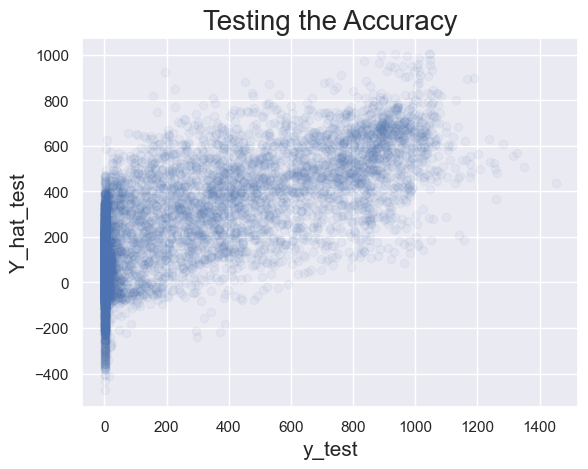

In [34]:
plt.scatter(y_test,y_hat_test, alpha=0.05)
plt.xlabel('y_test',fontsize=15)
plt.ylabel('Y_hat_test', fontsize=15)   #This is X_test predicted
plt.title('Testing the Accuracy', fontsize=20)
plt.show()

# when we create the testing dataset summary, we will use y_test as target and y_hat_test(which actually is X_test predicted)
# as predictions, and then compute further residuals and differences.

# The alpha uses the blurring concept to show where the maximum points are concentrated and we see they are evenly spread
# after being concentrated initially, and a straight line can be fit.

### Testing Dataset

In [35]:
df_pf = pd.DataFrame(y_hat_test, columns=['Predictions'])

In [36]:
df_pf['Target'] = y_test

In [37]:
y_test

array([477.77, 399.87, 910.28, ...,   1.26,   1.22,   1.21])

In [38]:
df_pf

,Predictions,Target
0,570.445581,477.77
1,189.396667,399.87
2,640.369699,910.28
3,-45.855011,1.22
4,142.607513,1.27
...,...,...
9801,665.419436,828.96
9802,70.462927,1.26
9803,174.809098,1.26
9804,61.865196,1.22


In [39]:
df_pf['Residuals'] = df_pf['Predictions'] - df_pf['Target']

In [40]:
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['Target']*100)

In [41]:
df_pf.sort_values(by='Difference%')

,Predictions,Target,Residuals,Difference%
9061,365.848053,365.83,0.018053,0.004935
7277,513.961753,513.80,0.161753,0.031482
940,335.181570,334.75,0.431570,0.128923
7608,186.764487,187.09,-0.325513,0.173988
7222,718.165862,719.54,-1.374138,0.190975
...,...,...,...,...
4843,443.280330,1.23,442.050330,35939.051236
8175,461.325421,1.22,460.105421,37713.559114
4957,465.914488,1.21,464.704488,38405.329567
433,470.159054,1.22,468.939054,38437.627338


In [42]:
df_pf_better = df_pf[df_pf['Difference%']<100]

### Final Testing Dataset... 3412 rows

In [43]:
df_pf_better.sort_values(by='Difference%').head(10)

,Predictions,Target,Residuals,Difference%
9061,365.848053,365.83,0.018053,0.004935
7277,513.961753,513.80,0.161753,0.031482
940,335.181570,334.75,0.431570,0.128923
7608,186.764487,187.09,-0.325513,0.173988
7222,718.165862,719.54,-1.374138,0.190975
7486,70.137404,69.99,0.147404,0.210607
9564,426.179695,425.22,0.959695,0.225694
9638,447.476944,448.50,-1.023056,0.228106
8874,579.848305,578.24,1.608305,0.278138
2482,438.248345,436.90,1.348345,0.308616


### Training Dataset

In [44]:
df_tr = pd.DataFrame(y_hat, columns=['Predcitions'])
# model.predict(X_train) is y_hat

In [45]:
X_train_new = pd.DataFrame(X_train)

In [46]:
df_tr['Target'] = y_train

In [47]:
df_tr['Residuals'] = df_tr['Predcitions'] - df_tr['Target']

In [48]:
df_tr['Difference%'] = np.absolute(df_tr['Residuals']/df_tr['Target']*100)

In [49]:
df_tr_better = df_tr[df_tr['Difference%']<100]

### Final Training Dataset...7905 rows

In [50]:
df_tr_better.sort_values(by='Difference%').head(10)

,Predcitions,Target,Residuals,Difference%
8237,599.559743,599.61,-0.050257,0.008382
16986,565.239959,565.15,0.089959,0.015918
1743,30.939268,30.95,-0.010732,0.034676
7029,390.607127,390.82,-0.212873,0.054468
8546,213.585282,213.46,0.125282,0.058691
12713,452.090420,452.40,-0.309580,0.068431
8726,704.955553,704.41,0.545553,0.077448
16457,709.831874,710.51,-0.678126,0.095442
18114,630.976531,631.67,-0.693469,0.109783
18699,302.004368,301.66,0.344368,0.114158
